Se encontró una coincidencia para 'valorant': 'valorant'.
Se recomendó el juego: 'valorant' (coincidencia encontrada).
Se encontró una coincidencia para 'mortal kombat': 'mortal kombat'.
Se recomendó el juego: 'mortal kombat' (coincidencia encontrada).
Se encontró una coincidencia para 'sonic': 'sonic x'.
Se recomendó el juego: 'sonic x' (coincidencia encontrada).

Calculando similitudes usando el método Coseno:


/tmp/ipykernel_15215/1101365212.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Similitud', y='Juego Similar', data=df_similitudes, palette='viridis')


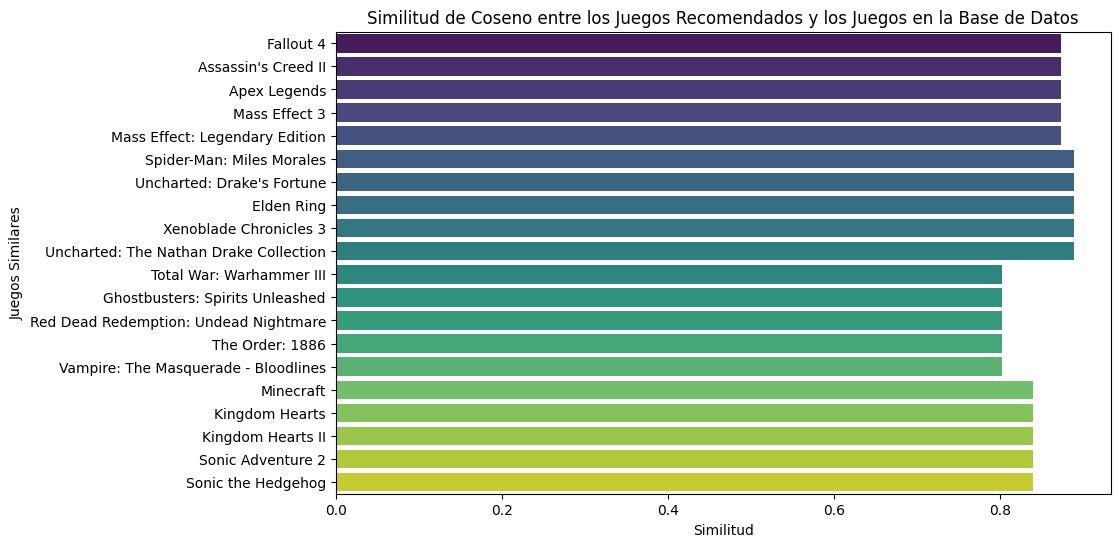


Valores de Similitud de Coseno entre los Juegos Recomendados y los demás Juegos:
                             Juego Similar  Similitud
0                                Fallout 4   0.873202
1                      Assassin's Creed II   0.873202
2                             Apex Legends   0.873202
3                            Mass Effect 3   0.873202
4           Mass Effect: Legendary Edition   0.873202
5                Spider-Man: Miles Morales   0.889111
6               Uncharted: Drake's Fortune   0.889111
7                               Elden Ring   0.889111
8                   Xenoblade Chronicles 3   0.889111
9   Uncharted: The Nathan Drake Collection   0.889111
10                Total War: Warhammer III   0.803247
11         Ghostbusters: Spirits Unleashed   0.803247
12   Red Dead Redemption: Undead Nightmare   0.803247
13                         The Order: 1886   0.803247
14    Vampire: The Masquerade - Bloodlines   0.803247
15                               Minecraft   0.840401


/tmp/ipykernel_15215/1101365212.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Similitud', y='Juego Similar', data=df_similitudes, palette='viridis')


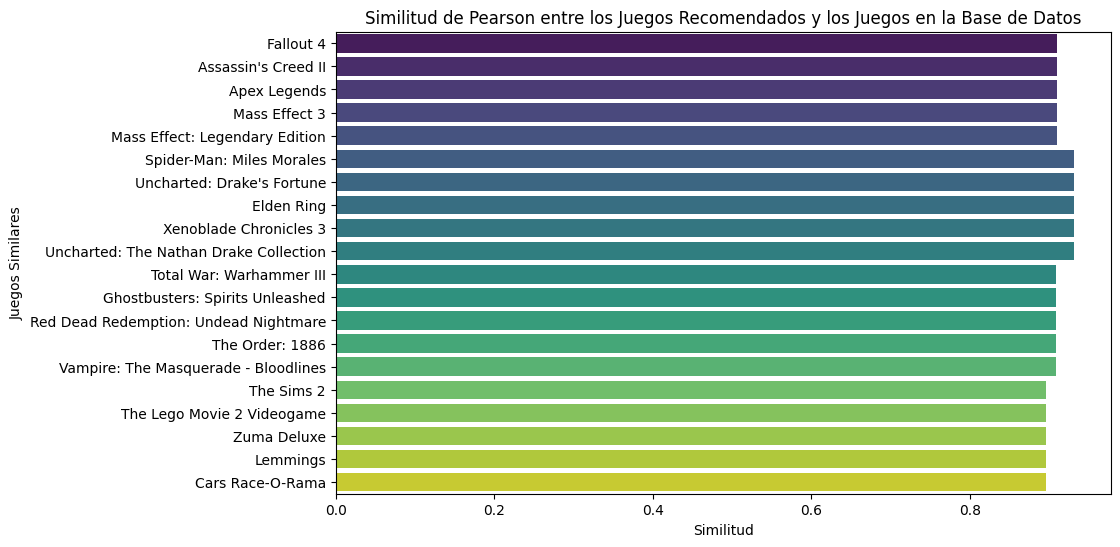


Valores de Similitud de Pearson entre los Juegos Recomendados y los demás Juegos:
                             Juego Similar  Similitud
0                                Fallout 4   0.909766
1                      Assassin's Creed II   0.909766
2                             Apex Legends   0.909766
3                            Mass Effect 3   0.909766
4           Mass Effect: Legendary Edition   0.909766
5                Spider-Man: Miles Morales   0.931034
6               Uncharted: Drake's Fortune   0.931034
7                               Elden Ring   0.931034
8                   Xenoblade Chronicles 3   0.931034
9   Uncharted: The Nathan Drake Collection   0.931034
10                Total War: Warhammer III   0.908499
11         Ghostbusters: Spirits Unleashed   0.908499
12   Red Dead Redemption: Undead Nightmare   0.908499
13                         The Order: 1886   0.908499
14    Vampire: The Masquerade - Bloodlines   0.908499
15                              The Sims 2   0.896455

/tmp/ipykernel_15215/1101365212.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Similitud', y='Juego Similar', data=df_similitudes, palette='viridis')


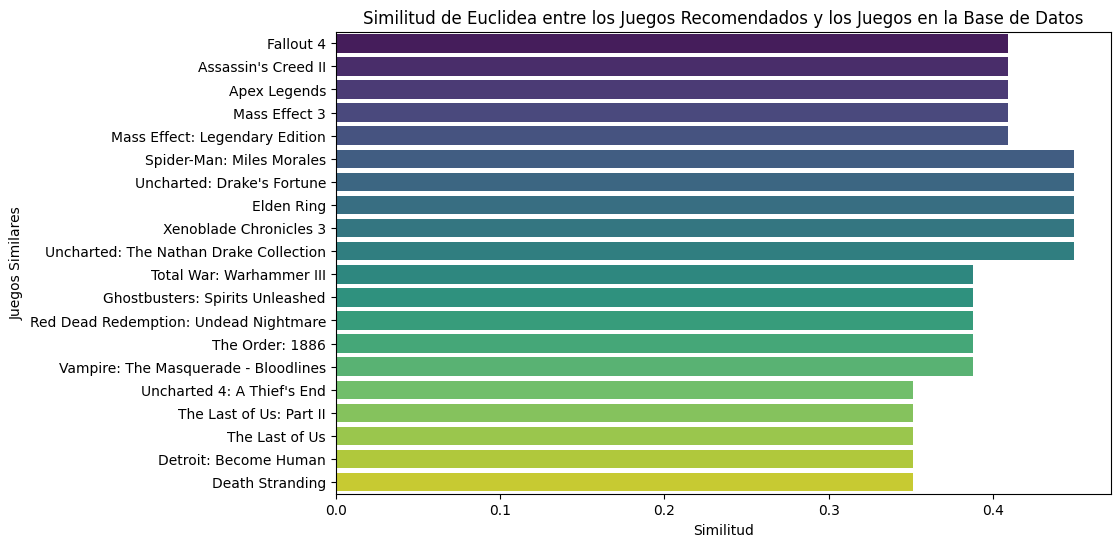


Valores de Similitud de Euclidea entre los Juegos Recomendados y los demás Juegos:
                             Juego Similar  Similitud
0                                Fallout 4   0.409233
1                      Assassin's Creed II   0.409233
2                             Apex Legends   0.409233
3                            Mass Effect 3   0.409233
4           Mass Effect: Legendary Edition   0.409233
5                Spider-Man: Miles Morales   0.449040
6               Uncharted: Drake's Fortune   0.449040
7                               Elden Ring   0.449040
8                   Xenoblade Chronicles 3   0.449040
9   Uncharted: The Nathan Drake Collection   0.449040
10                Total War: Warhammer III   0.387781
11         Ghostbusters: Spirits Unleashed   0.387781
12   Red Dead Redemption: Undead Nightmare   0.387781
13                         The Order: 1886   0.387781
14    Vampire: The Masquerade - Bloodlines   0.387781
15              Uncharted 4: A Thief's End   0.35153

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import correlation
import difflib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import jaccard_score

df = pd.read_csv("imdb-videogames.csv")

df['name_normalized'] = df['name'].str.lower().str.strip()

def obtener_titulo_sugerido(titulo_ingresado, lista_titulos, cutoff=0.4):
    titulos_similares = difflib.get_close_matches(titulo_ingresado.lower(), lista_titulos, n=5, cutoff=cutoff)
    if titulos_similares:
        print(f"Se encontró una coincidencia para '{titulo_ingresado}': '{titulos_similares[0]}'.")
        return [titulos_similares[0]]
    else:
        print(f"No se encontró ninguna coincidencia cercana para '{titulo_ingresado}'.")
        return []

recomendaciones = []

for i in range(3):
    juego = input(f"Jugador {i+1}, ingresa el nombre de tu juego recomendado: ").strip()
    titulos_encontrados = obtener_titulo_sugerido(juego, df['name_normalized'])
    
    if titulos_encontrados:
        recomendaciones.append(titulos_encontrados[0])
        print(f"Se recomendó el juego: '{titulos_encontrados[0]}' (coincidencia encontrada).")
    else:
        print(f"El juego '{juego}' no se encontró en la base de datos.")

juegos_recomendados = df[df['name_normalized'].isin(recomendaciones)]

generos_columns = ['Action', 'Adventure', 'Comedy', 'Crime', 'Family', 'Fantasy', 'Mystery', 'Sci-Fi', 'Thriller']

for col in generos_columns:
    df[col] = df[col].astype(bool)

caracteristicas_recomendadas = juegos_recomendados[generos_columns]

scaler = StandardScaler()
caracteristicas_normalizadas = scaler.fit_transform(df[generos_columns])

# Función para calcular la similitud utilizando diferentes métodos
def calcular_similitud(metodo, caracteristicas_recomendadas, caracteristicas_normalizadas):
    if metodo == 'coseno':
        return cosine_similarity(caracteristicas_recomendadas, caracteristicas_normalizadas)
    elif metodo == 'pearson':
        # Calcular la similitud de Pearson entre las características
        similitudes_pearson = []
        for i in range(len(caracteristicas_recomendadas)):
            similitudes_pearson.append([1 - correlation(caracteristicas_recomendadas.iloc[i], row) for row in caracteristicas_normalizadas])
        return np.array(similitudes_pearson)
    elif metodo == 'euclidea':
        return 1 / (1 + euclidean_distances(caracteristicas_recomendadas, caracteristicas_normalizadas))
    
def graficar_similitudes(similitudes, juegos_recomendados, df, metodo, top_n=5):
    juegos_recomendados_names = juegos_recomendados['name'].values.tolist()
    if len(similitudes) != len(juegos_recomendados_names):
        print(f"Error: La cantidad de juegos recomendados ({len(juegos_recomendados_names)}) no coincide con la dimensión de las similitudes ({len(similitudes)}).")
        return

    similitudes_list = []
    for i, juego_recomendado in enumerate(juegos_recomendados_names):
        similitudes_juego = similitudes[i]
        similitudes_juego = list(enumerate(similitudes_juego))
        similitudes_juego = sorted(similitudes_juego, key=lambda x: x[1], reverse=True)
        
        juegos_similares = similitudes_juego[1:top_n+1]
        similitudes_list.extend(juegos_similares)
    
    df_similitudes = pd.DataFrame(similitudes_list, columns=['Juego Índice', 'Similitud'])
    df_similitudes['Juego Similar'] = df_similitudes['Juego Índice'].apply(lambda x: df.iloc[x]['name'])
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Similitud', y='Juego Similar', data=df_similitudes, palette='viridis')
    plt.title(f'Similitud de {metodo.capitalize()} entre los Juegos Recomendados y los Juegos en la Base de Datos')
    plt.xlabel('Similitud')
    plt.ylabel('Juegos Similares')
    plt.show()
    
    print(f"\nValores de Similitud de {metodo.capitalize()} entre los Juegos Recomendados y los demás Juegos:")
    print(df_similitudes[['Juego Similar', 'Similitud']])

metodos = ['coseno', 'pearson', 'euclidea']
for metodo in metodos:
    print(f"\nCalculando similitudes usando el método {metodo.capitalize()}:")
    similitudes = calcular_similitud(metodo, caracteristicas_recomendadas, caracteristicas_normalizadas)
    graficar_similitudes(similitudes, juegos_recomendados, df, metodo, top_n=5)
